# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
#config
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=90fcd59b7530eec805483b3d01517159&units=metric&q=


In [5]:
cities

['kapaa',
 'jiddah',
 'hwange',
 'ushuaia',
 'yermakovskoye',
 'ribeira grande',
 'zaozerne',
 'punta arenas',
 'luderitz',
 'mataura',
 'puerto ayora',
 'carnarvon',
 'vaitupu',
 'adrar',
 'malkangiri',
 'canutama',
 'rikitea',
 'avarua',
 'busselton',
 'albany',
 'ambilobe',
 'vardo',
 'ossora',
 'mount darwin',
 'longyearbyen',
 'tuktoyaktuk',
 'cape town',
 'peniche',
 'torbay',
 'yellowknife',
 'manta',
 'hilo',
 'chuy',
 'aklavik',
 'belushya guba',
 'viligili',
 'bengkulu',
 'arraial do cabo',
 'penzance',
 'jamestown',
 'languyan',
 'waipawa',
 'iqaluit',
 'hami',
 'ostrovnoy',
 'mys shmidta',
 'rio grande',
 'bredasdorp',
 'zhanatas',
 'bereda',
 'mrirt',
 'taolanaro',
 'cherskiy',
 'barrow',
 'vao',
 'clyde river',
 'shahr-e kord',
 'kaoma',
 'saint-philippe',
 'butaritari',
 'verkhnevilyuysk',
 'marcona',
 'saskylakh',
 'provideniya',
 'lebu',
 'la ronge',
 'haysyn',
 'keelung',
 'taoudenni',
 'rawson',
 'hasaki',
 'namibe',
 'deputatskiy',
 'belyy yar',
 'cabedelo',
 'conak

In [6]:
#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
lon = []
date = []
country = []
temp = []
humidity = []
cloudiness = []
speed = []
cityname = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        print(city)
        time.sleep(1.0)
    except:
        print("City not found... skipping.")

kapaa
City not found... skipping.
hwange
ushuaia
yermakovskoye
ribeira grande
zaozerne
punta arenas
luderitz
mataura
puerto ayora
carnarvon
City not found... skipping.
adrar
malkangiri
canutama
rikitea
avarua
busselton
albany
ambilobe
vardo
ossora
mount darwin
longyearbyen
tuktoyaktuk
cape town
peniche
torbay
yellowknife
manta
hilo
chuy
aklavik
City not found... skipping.
City not found... skipping.
City not found... skipping.
arraial do cabo
penzance
jamestown
languyan
waipawa
iqaluit
hami
ostrovnoy
City not found... skipping.
rio grande
bredasdorp
City not found... skipping.
bereda
City not found... skipping.
City not found... skipping.
cherskiy
barrow
vao
clyde river
shahr-e kord
kaoma
saint-philippe
butaritari
verkhnevilyuysk
City not found... skipping.
saskylakh
provideniya
lebu
la ronge
haysyn
keelung
taoudenni
rawson
hasaki
namibe
deputatskiy
belyy yar
cabedelo
conakry
City not found... skipping.
atuona
harper
east london
waingapu
port alfred
new norfolk
comodoro rivadavia
hobar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

['palabuhanratu',
 'kapaa',
 'caravelas',
 'rikitea',
 'dikson',
 'east london',
 'mar del plata',
 'portland',
 'hobart',
 'ushuaia']

In [26]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cityname,
    "Lat": lat,
    "Lon": lon,
    "Country": country,
    "Date": date,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lon,Country,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,22.08,-159.32,US,1551401605,24.00,47,40,8.20
1,Hwange,-18.35,26.50,ZW,1551401869,21.56,68,8,1.46
2,Ushuaia,-54.81,-68.31,AR,1551401358,7.06,100,92,1.51
3,Yermakovskoye,53.28,92.40,RU,1551401873,-8.55,72,80,1.31
4,Ribeira Grande,38.52,-28.70,PT,1551401876,16.68,93,36,8.66
5,Zaozerne,51.37,23.94,UA,1551401877,1.78,70,88,9.16
6,Punta Arenas,-53.16,-70.91,CL,1551401589,11.00,81,75,2.10
7,Luderitz,-26.65,15.16,NA,1551401882,16.96,75,0,7.51
8,Mataura,-46.19,168.86,NZ,1551401408,14.44,86,64,5.81
9,Puerto Ayora,-0.74,-90.35,EC,1551398400,28.00,74,75,3.10


In [30]:
weather_data.to_csv("weather_data.csv", index=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

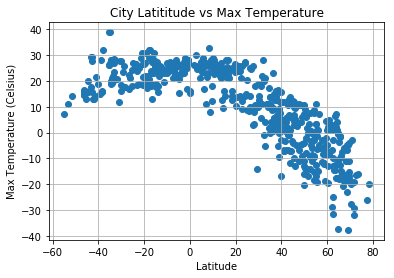

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latititude vs Max Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatititudevsMaxTemperature.png")

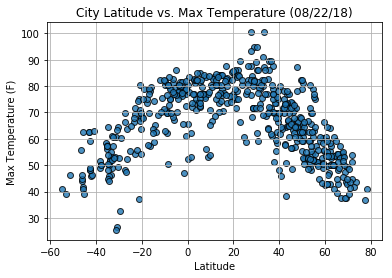

#### Latitude vs. Humidity Plot

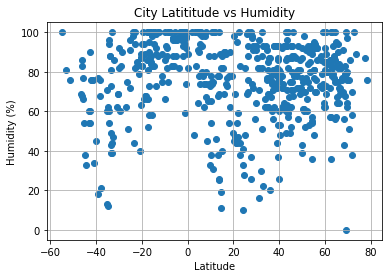

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latititude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatititudevsHumidity.png")

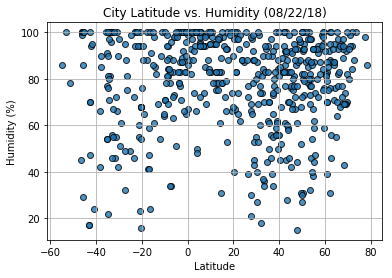

#### Latitude vs. Cloudiness Plot

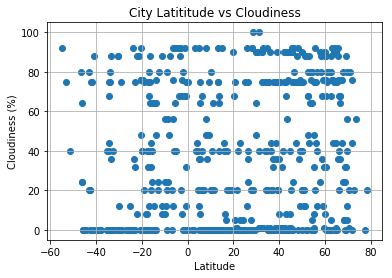

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latititude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatititudevsCloudiness.png")

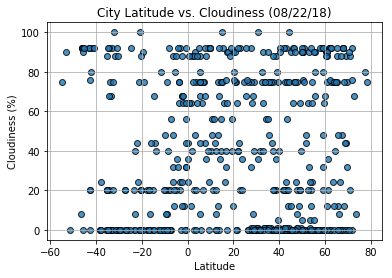

#### Latitude vs. Wind Speed Plot

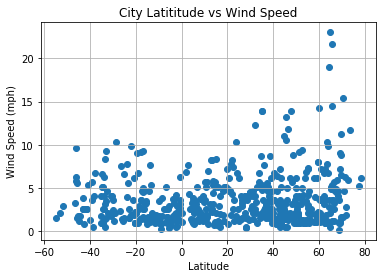

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latititude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatititudevsWindSpeed.png")

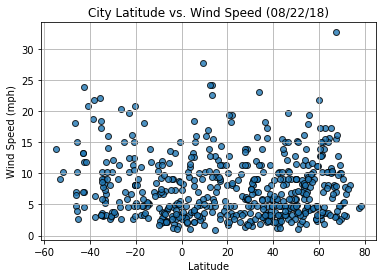